<a href="https://colab.research.google.com/github/KavyaRaveendran/AvyaK/blob/main/Copy_of_Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl http://www.codeheroku.com/static/workshop/datasets/student_scores.csv -o student_scores.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   151  100   151    0     0   1013      0 --:--:-- --:--:-- --:--:--  1013


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/archive(4).zip")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


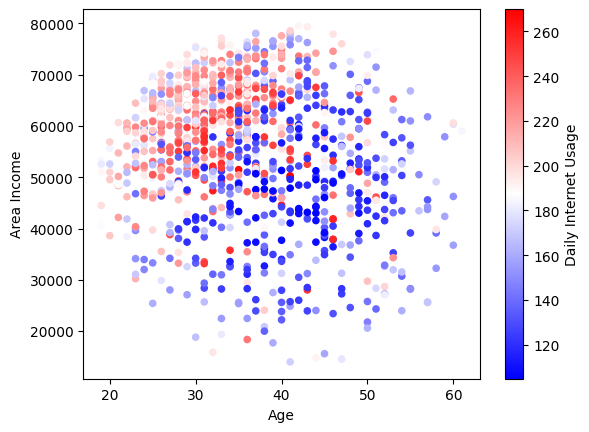

In [15]:
x = df["Age"]
y = df["Area Income"]
z= df["Daily Internet Usage"]
df.plot.scatter(x="Age",y="Area Income",c="Daily Internet Usage",colormap='bwr')
plt.show()

In [7]:
def sigmoid(z):
    
    return 1 / (1+ np.exp(-z))

In [8]:
def logistic_regression(all_x,all_y,m,b):
    for x,y_actual in zip(all_x,all_y):
        y_pred = sigmoid(m*x+b)
        error = y_pred - y_actual
        
        delta_m = -1 * (error * x) * 0.05 
        delta_b = -1 * (error) * 0.05
        
        m = m + delta_m
        b = b + delta_b
        
    return m,b    

In [9]:
m = 0
b = 0
for i in range(0,100):
    m,b = logistic_regression(x,y,m,b)
m,b    

(9794797945.92533, 274995000.4250133)

In [10]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []
    for x in X.values:
        y = sigmoid(m*x + b)
        sig.append(y)

    return sig

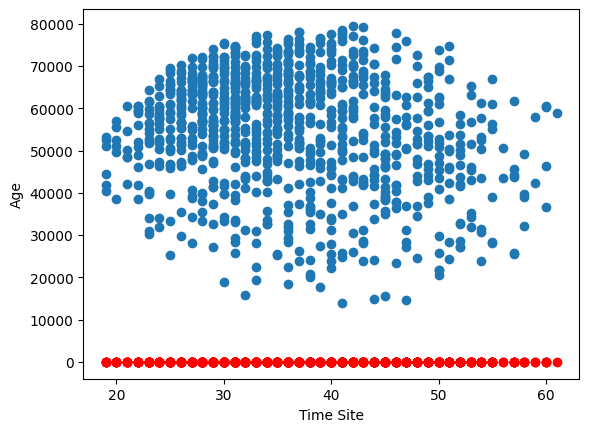

In [12]:
plt.plot(x,y,'o')
plt.xlabel("Time Site")
plt.ylabel("Age")

sig = get_sigmoid(x,m,b)
plt.plot(x,sig,'ro')
plt.show()

In [13]:
def predict(x,m,b):
    y = sigmoid(m*x + b)
    
    if y > 0.5:
        return 1
    else:
        return 0

df["Predictions"] = df.apply(lambda row: predict(row["Age"],m,b),axis=1)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Predictions
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1
